In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def read_skeleton(file):
    with open(file, 'r') as f:
        skeleton_sequence = {}
        skeleton_sequence['numFrame'] = int(f.readline())
        skeleton_sequence['frameInfo'] = []
        for t in range(skeleton_sequence['numFrame']):
            frame_info = {}
            frame_info['numBody'] = int(f.readline())
            frame_info['bodyInfo'] = []
            for m in range(frame_info['numBody']):
                body_info = {}
                body_info_key = [
                    'bodyID', 'clipedEdges', 'handLeftConfidence',
                    'handLeftState', 'handRightConfidence', 'handRightState',
                    'isResticted', 'leanX', 'leanY', 'trackingState'
                ]
                body_info = {
                    k: float(v)
                    for k, v in zip(body_info_key, f.readline().split())
                }
                body_info['numJoint'] = int(f.readline())
                body_info['jointInfo'] = []
                for v in range(body_info['numJoint']):
                    joint_info_key = [
                        'x', 'y', 'z', 'depthX', 'depthY', 'colorX', 'colorY',
                        'orientationW', 'orientationX', 'orientationY',
                        'orientationZ', 'trackingState'
                    ]
                    joint_info = {
                        k: float(v)
                        for k, v in zip(joint_info_key, f.readline().split())
                    }
                    body_info['jointInfo'].append(joint_info)
                frame_info['bodyInfo'].append(body_info)
            skeleton_sequence['frameInfo'].append(frame_info)
    return skeleton_sequence

In [3]:
def read_xyz(file, max_body=2, num_joint=25):
    seq_info = read_skeleton(file)
    data = np.zeros((3, seq_info['numFrame'], num_joint, max_body))
    for n, f in enumerate(seq_info['frameInfo']):
        for m, b in enumerate(f['bodyInfo']):
            for j, v in enumerate(b['jointInfo']):
                if m < max_body and j < num_joint:
                    data[:, n, j, m] = [v['x'], v['y'], v['z']]
                else:
                    pass
    return data

In [4]:
data_path = '/home/youngjoon/nturgb+d_skeletons/S023C002P057R001A091.skeleton'
point = read_xyz(data_path)   # shape (3, num_frames, joints, 2)
print('read data done!')

read data done!


In [5]:
xmax = np.max(point[0, :, :, :]) + 0.5
xmin = np.min(point[0, :, :, :]) - 0.5
ymax = np.max(point[1, :, :, :]) + 0.3
ymin = np.min(point[1, :, :, :]) - 0.3
zmax = np.max(point[2, :, :, :])
zmin = np.min(point[2, :, :, :])

In [6]:
row = point.shape[1]
print(point.shape)

(3, 54, 25, 2)


In [7]:
arms = [23, 11, 10, 9, 8, 20, 4, 5, 6, 7, 21]
rightHand = [11, 24]
leftHand = [7, 22]
legs = [19, 18, 17, 16, 0, 12, 13, 14, 15]
body = [3, 2, 20, 1, 0]

In [8]:
n = 0     
m = row   
plt.figure()
plt.ion()

<Figure size 432x288 with 0 Axes>

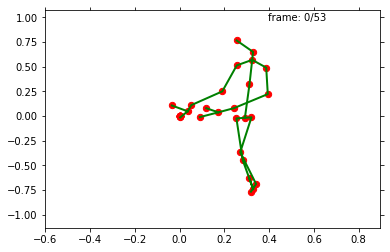

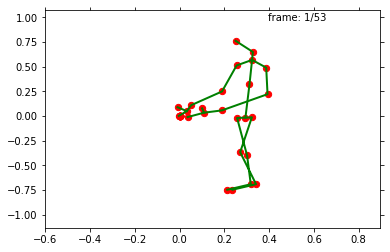

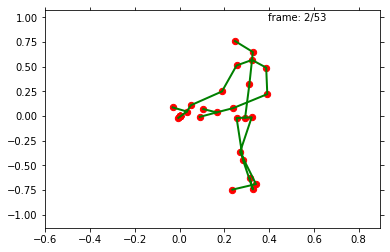

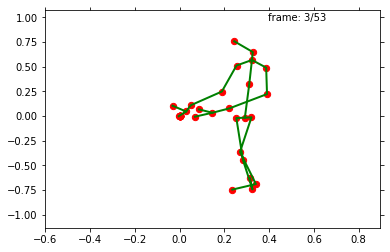

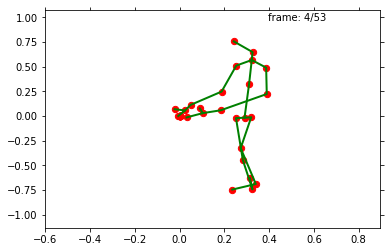

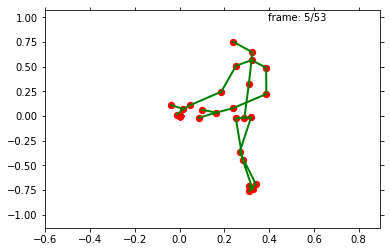

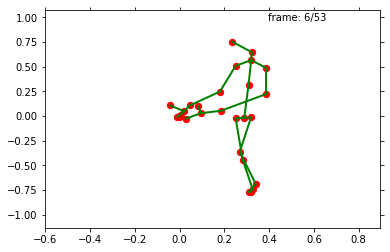

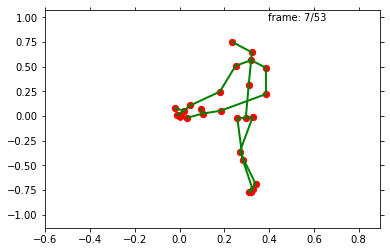

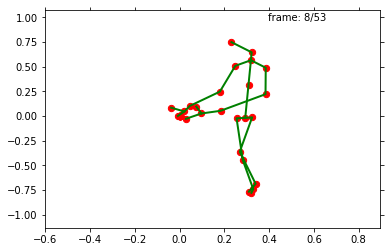

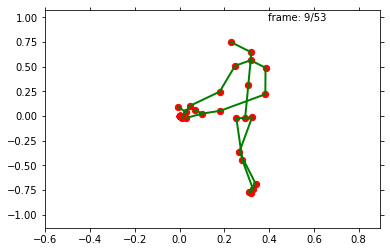

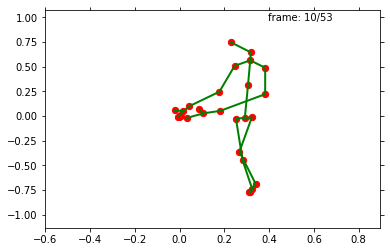

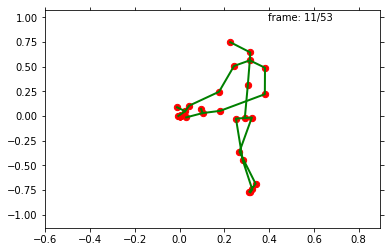

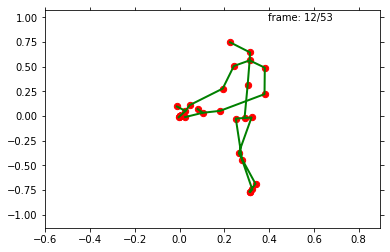

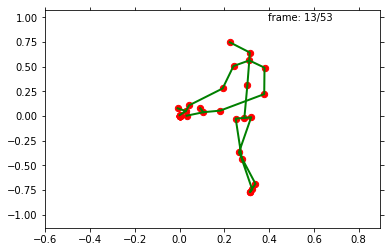

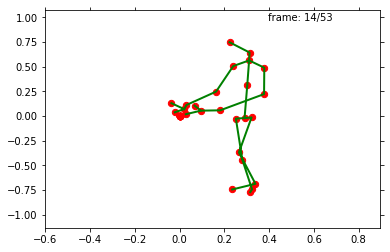

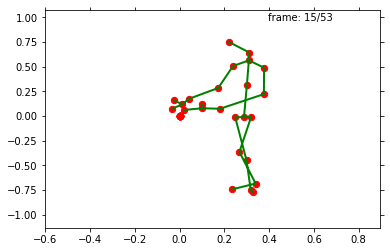

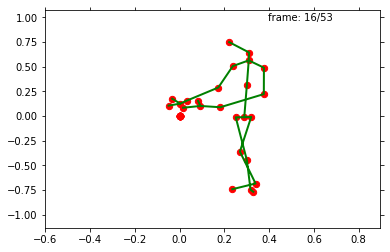

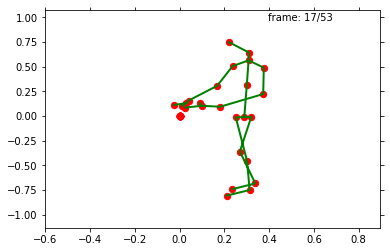

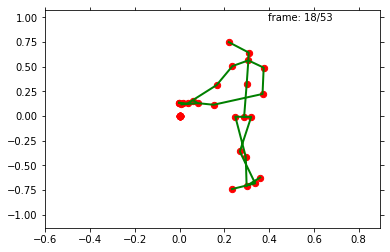

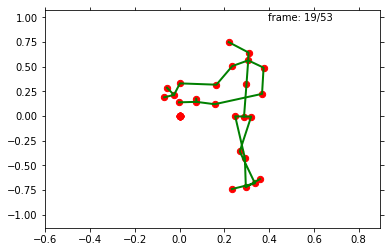

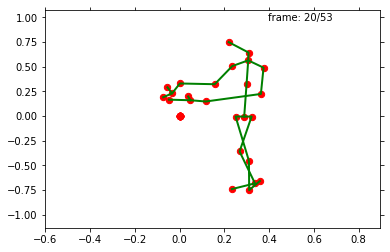

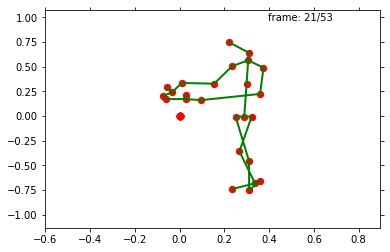

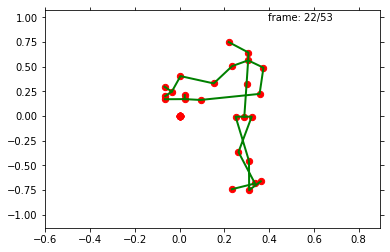

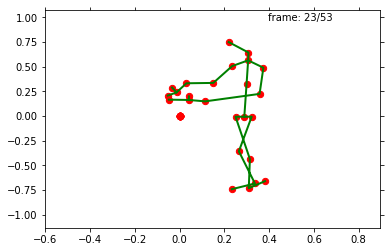

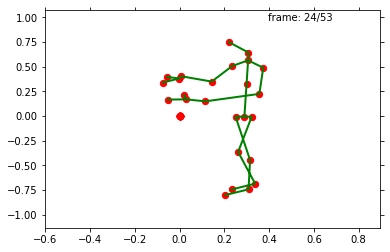

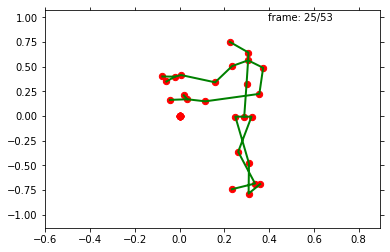

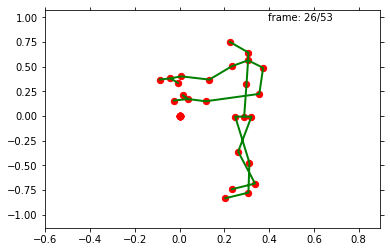

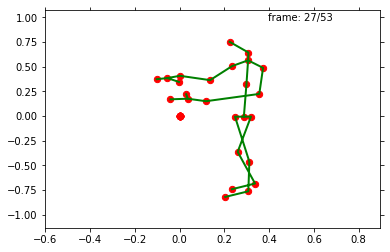

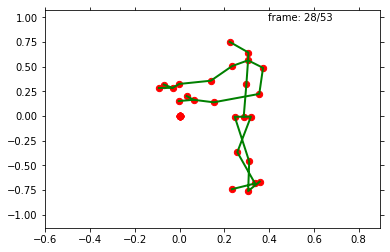

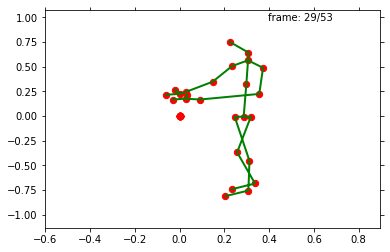

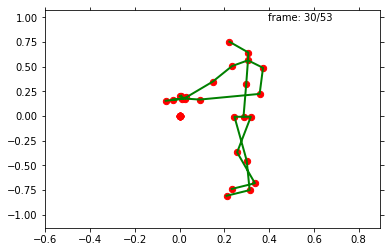

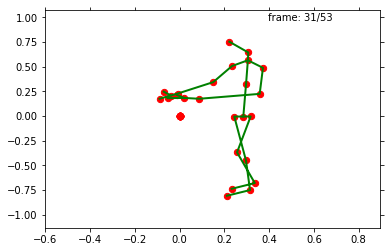

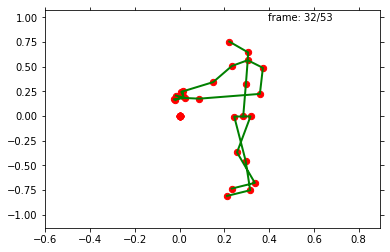

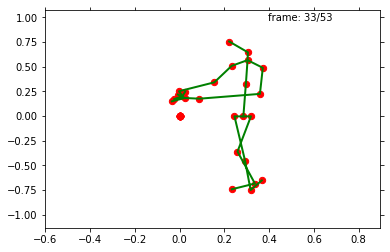

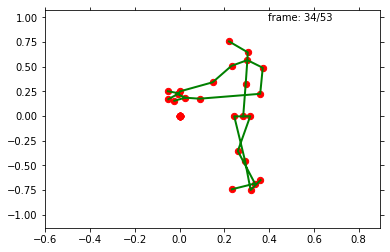

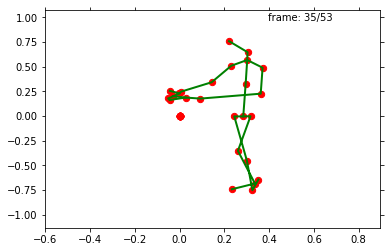

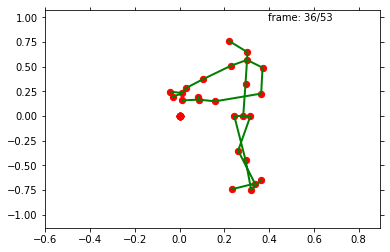

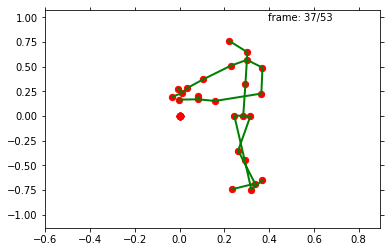

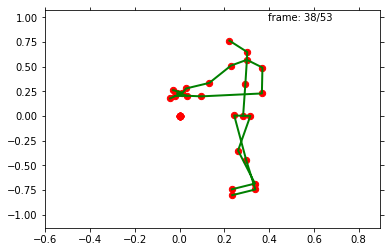

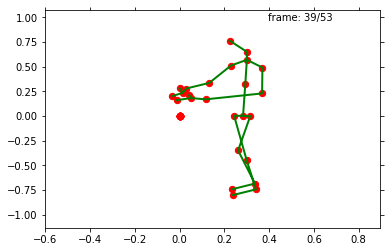

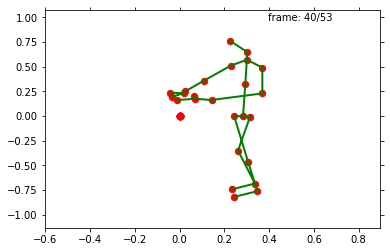

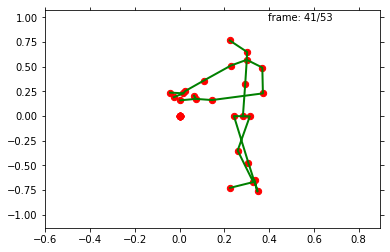

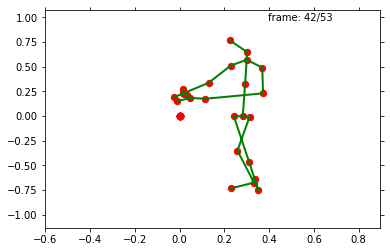

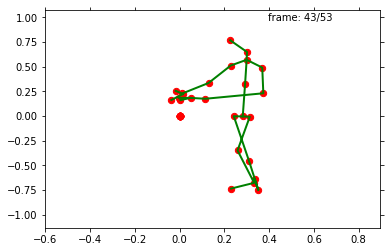

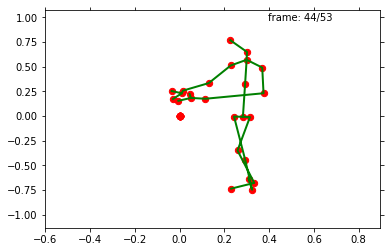

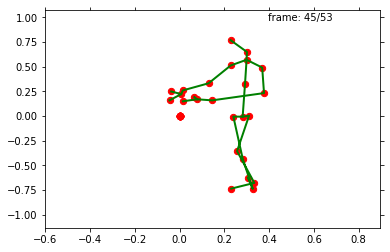

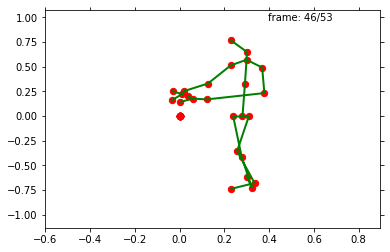

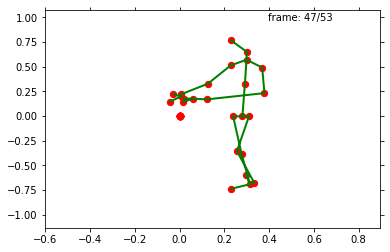

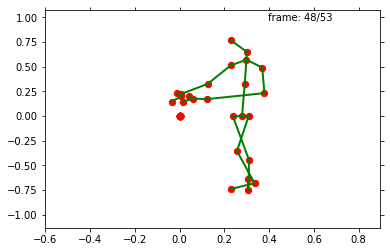

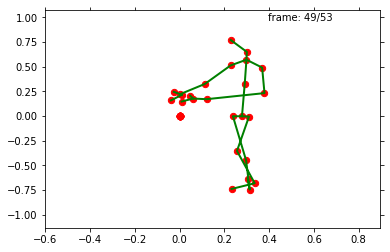

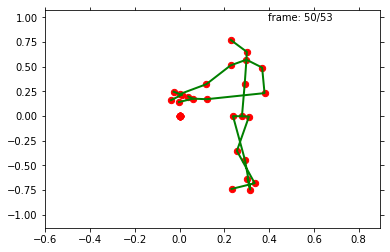

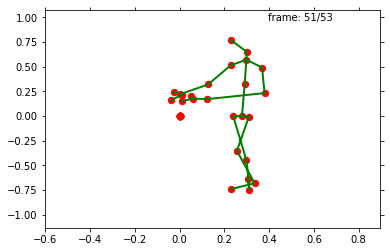

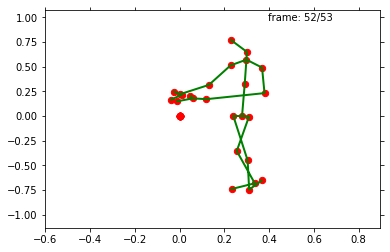

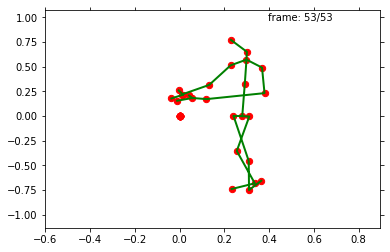

In [9]:
for i in range(n, m):
    plt.cla()
    plt.scatter(point[0, i, :, :], point[1, i, :, :], c='red', s=40.0)
    plt.plot(point[0, i, arms, 0], point[1, i, arms, 0], c='green', lw=2.0)
    plt.plot(point[0, i, rightHand, 0], point[1, i, rightHand, 0], c='green', lw=2.0)
    plt.plot(point[0, i, leftHand, 0], point[1, i, leftHand, 0], c='green', lw=2.0)
    plt.plot(point[0, i, legs, 0], point[1, i, legs, 0], c='green', lw=2.0)
    plt.plot(point[0, i, body, 0], point[1, i, body, 0], c='green', lw=2.0)
     
    plt.plot(point[0, i, arms, 1], point[1, i, arms, 1], c='green', lw=2.0)
    plt.plot(point[0, i, rightHand, 1], point[1, i, rightHand, 1], c='green', lw=2.0)
    plt.plot(point[0, i, leftHand, 1], point[1, i, leftHand, 1], c='green', lw=2.0)
    plt.plot(point[0, i, legs, 1], point[1, i, legs, 1], c='green', lw=2.0)
    plt.plot(point[0, i, body, 1], point[1, i, body, 1], c='green', lw=2.0)
     
    plt.text(xmax-0.5, ymax-0.1, 'frame: {}/{}'.format(i, row-1))
    # plt.text(xmax-0.8, ymax-0.4, 'label: ' + str(label[i]))
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.pause(0.001)

plt.ioff()
plt.show()